<a href="https://colab.research.google.com/github/eshaghjahangiri/RL-Lab-AMASES-Summer-School/blob/main/ReinforcementLearning_LAB_1stPart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning: Solving Frozen Lake**

In this file, we will solve some interesting problems using Reinforcement Learning (RL) algorithms: **SARSA** and **Q-Learning**.

---

## **Let's Play a Game!**

The name of the game is **FROZEN LAKE!** We want to create an agent who can successfully complete the game!

### **What is the game? What are the rules?**

---

### **Objective:**

The agent's goal is to navigate from the starting point (**S**) to the goal (**G**) on a grid of tiles.

---

### **Grid:**

Typically, the grid can be **4x4** or **8x8**, containing:

- **S**: Starting point (always safe)
- **F**: Frozen surface (safe)
- **H**: Hole (causes the agent to fall and lose)
- **G**: Goal (where the agent needs to reach)

---

### **Actions:**

The agent can move in four directions:

- **0**: Left
- **1**: Down
- **2**: Right
- **3**: Up

---

### **Dynamics:**

- If `is_slippery=True`, the agent's actions might not always result in the intended direction (stochastic transitions).
- If `is_slippery=False`, the agent's actions result in deterministic transitions.

---

Let's get started and see if we can train an agent to master the **Frozen Lake** game using RL algorithms!


# Import Libraries

In [2]:
!pip install gymnasium
!apt-get install -y xvfb
!pip install pyvirtualdisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ub

In [3]:
# pandas: A powerful data manipulation and analysis library for Python,
#providing data structures like DataFrame for managing and analyzing data efficiently.
import pandas as pd

# numpy: A fundamental library for scientific computing in Python,
#offering support for arrays, matrices, and a wide range of mathematical functions.
import numpy as np

# gymnasium: A toolkit for developing and comparing reinforcement learning algorithms,
# featuring a wide variety of environments.
import gymnasium as gym

# pygame: A cross-platform set of Python modules designed for writing video games,
#providing functionalities for graphics, sound, and input handling.
import pygame

# time: A module that provides various time-related functions,
#such as measuring time intervals and delays.
import time

# os: A module that provides a way of using operating system-dependent
#functionality like reading or writing to the file system.
import os

# matplotlib.pyplot: A plotting library for the Python programming language
#and its numerical mathematics extension NumPy, offering a MATLAB-like interface.
import matplotlib.pyplot as plt

# IPython.display: A submodule of IPython for rich display and visualization
#in Jupyter Notebooks, allowing the embedding of images, videos, HTML, and more.
from IPython import display as ipythondisplay

# pyvirtualdisplay: A Python wrapper for Xvfb, a virtual framebuffer, which allows
#headless display for running applications that require a graphical user interface.
from pyvirtualdisplay import Display

# pickle: A module for serializing and de-serializing Python object structures,
# allowing for the saving and loading of Python objects.
import pickle


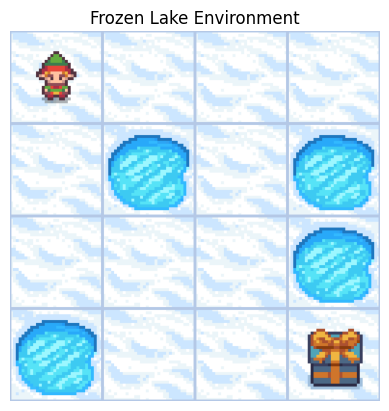

In [9]:
def render_frozen_lake():
    env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode='rgb_array')
    env.reset()
    img = env.render()

    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title("Frozen Lake Environment")
    plt.show()
    env.close()

render_frozen_lake()

# Environment

Using Open AI gym to define the environment of the game

Link: https://gymnasium.farama.org/environments/toy_text/frozen_lake/



In [60]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='rgb_array') # Using FrozenLake-v1

In [61]:
print("Number of observation states:- ", env.observation_space.n)
print("Number of action space :- ", env.action_space.n)

Number of observation states:-  16
Number of action space :-  4


In [62]:
# The code env.reset() in a reinforcement learning environment is used to reset the environment to an initial state
# state 0
env.reset()

(0, {'prob': 1})

In [63]:
# The code env.observation_space returns the space that represents
# all possible observations that the environment can return.
env.observation_space

Discrete(16)

In [64]:
# The code env.action_space returns the space that represents all possible actions
# that can be taken in the environment.
env.action_space

Discrete(4)

In [65]:
# The code random_action = env.action_space.sample() generates a random action
# that is valid within the environment's action space.
random_action = env.action_space.sample()
random_action

1

In [66]:
# The code return_value = env.step(random_action) takes the random action generated
# and applies it to the environment.
# it returns Observation (after taking action), Reward, Truncation, Done, Info
return_value = env.step(random_action)
return_value

(4, 0.0, False, False, {'prob': 1.0})

In [67]:
# The code env.unwrapped.P[9][2] accesses the transition dynamics of the unwrapped environment. Specifically, it retrieves
# information about what happens when action 2 is taken from state 9.
# Probbility of this transition, Next state, Reward, Done
env.unwrapped.P[9][2]

[(1.0, 10, 0.0, False)]

## Let's see how a boy walks through the environment

In [4]:
# sets up and starts a virtual display.
display = Display(visible=0, size=(400, 300))
display.start()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


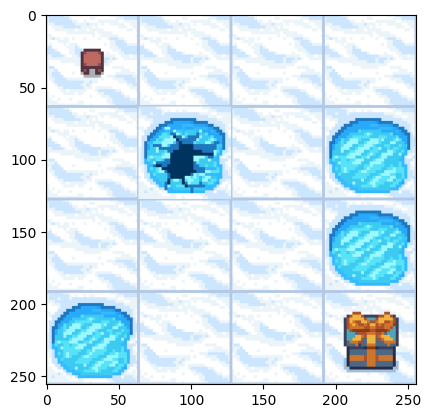

0.0


<Figure size 640x480 with 0 Axes>

In [29]:
episodes = 3 # number of episodes
# define the environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='rgb_array') # Using FrozenLake-v1
# initialize the Q-table
Qtable = np.zeros((env.observation_space.n, env.action_space.n))

# rewards array to save rewards
rewards_episode = np.zeros(episodes)

for i in range(episodes):

    state = env.reset()[0] # reset the environment so the agent is at state 0
    terminated = False # True when it reaches the goal or fall in hole
    truncated = False # True when actions > 200

    while(not terminated and not truncated):

        action = env.action_space.sample() # taking a random action in the environment

        next_state, reward, terminated, truncated, _ = env.step(action) # response of the environment to the action taken by the agent
        state = next_state

        # rendering environment to see the walk by the agent

        screen = env.render()
        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())

        time.sleep(1)

    if reward == 1:
        rewards_episode[i] = 1


    #
plt.clf()
env.close()

print(np.sum(rewards_episode))



# **Teaching the Agent: SARSA Algorithm**

You saw that just by taking random actions, the possibility of reaching the goal is very close to zero! **Let's teach the agent how it should learn by itself.**

---

## **SARSA Algorithm**

**SARSA** stands for State-Action-Reward-State-Action. It is a type of temporal difference learning method.

### **Key Characteristics:**

- **Model-Free**: No need to model the environment.
- **On-Policy**: Learns the value of the policy being followed.

### **Algorithm Steps:**

1. **Choose** learning rate (α) and discount factor (γ).
2. **Initialize** Q(s, a) for all state-action pairs.
3. **Initialize** state (S).
4. **Choose** action A from all available actions in state S, A(S), using an epsilon-greedy policy.

5. **Loop** until convergence or for a specified number of iterations:
   1. Take action A, get reward R, and reach state S' (next state).
   2. Choose action A' (next action) from all available actions in state S', A'(S'), using an epsilon-greedy policy.
   3. Update Q-value: `Q(s, a) ← Q(s, a) + α [R + γ * Q(s', a') - Q(s, a)]`
   4. Update state and action: `S ← S'`, `A ← A'`

---

With the SARSA algorithm, we aim to train our agent to make better decisions by learning from its experiences. Let's dive into the implementation and see how it works in practice!


In [30]:
# defining function for epsilon-greedy policy which take a random action when a random number is less than epsilon,
# and when it is greater than epsilon take the action which has the highest q-value in the current state

def epsilon_greedy_policy(qtable, state, epsilon):
    rng = np.random.default_rng() # generate random number

    if rng.random() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(qtable[state, :])
    return action

In [31]:
# defining function for updating q-value for SARSA method

def update_Qtable_SARSA(qtable, state, action, reward, next_state, next_action, alpha, gamma):

    qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * qtable[next_state, next_action] - qtable[state, action])

    return qtable

Now, we create a function to run the agent while learning how to reach the goal in the environment

In [34]:
def run_sarsa(episodes, render=False):

    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='rgb_array')

    Qtable = np.zeros((env.observation_space.n, env.action_space.n))

    alpha = 0.9 # learning rate
    gamma = 0.9 # gamma

    epsilon = 1 # 1 means always the agent takes a random action

    epsilon_decay_rate = 0.0001

    rng = np.random.default_rng() # generate random number

    rewards_episode = np.zeros(episodes)

    for i in range(episodes):

        state = env.reset()[0] # reset the environment so the agent is at state 0
        terminated = False # True when it reaches the goal or fall in hole
        truncated = False # True when actions > 200

        action = epsilon_greedy_policy(Qtable, state, epsilon)

        while(not terminated and not truncated):


            next_state, reward, terminated, truncated, _ = env.step(action)

            next_action = epsilon_greedy_policy(Qtable, next_state, epsilon)

            Qtable = update_Qtable_SARSA(Qtable, state, action, reward, next_state, next_action, alpha, gamma) # Update Qtable

            state = next_state
            action = next_action

            if render:
              screen = env.render()

              plt.imshow(screen)
              ipythondisplay.clear_output(wait=True)
              ipythondisplay.display(plt.gcf())


      # count a successful episode to analyze the performance of the agent
        plt.clf()

        epsilon = max(epsilon - epsilon_decay_rate, 0)
        if (epsilon==0):
              alpha = 0.0001
        if reward == 1:
              rewards_episode[i] = 1


    print("The number of successful episodes are: ", np.sum(rewards_episode))

    env.close()

    sum_rewards = np.zeros(episodes)

    for e in range(episodes):
      sum_rewards[e] = np.sum(rewards_episode[max(0, e - 100): (e+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake_sarsa.png')

    print('Q-table:\n', Qtable)
    f = open('qtable_updated_sarsa.pkl', 'wb')
    pickle.dump(Qtable, f)
    f.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The number of successful episodes are:  8420.0
Q-table:
 [[0.10394993 0.59049    0.10768876 0.10198552]
 [0.11060344 0.         0.00758077 0.00725421]
 [0.00722213 0.00779605 0.00127581 0.00767756]
 [0.01335911 0.         0.01254988 0.01368859]
 [0.05934477 0.6561     0.         0.0601595 ]
 [0.         0.         0.         0.        ]
 [0.         0.72980999 0.         0.00750745]
 [0.         0.         0.         0.        ]
 [0.1250055  0.         0.729      0.06178016]
 [0.53470859 0.081      0.81       0.        ]
 [0.5396818  0.9        0.         0.00757397]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.74771171 0.9        0.29363141]
 [0.80977882 0.9        1.         0.80571007]
 [0.         0.         0.         0.        ]]


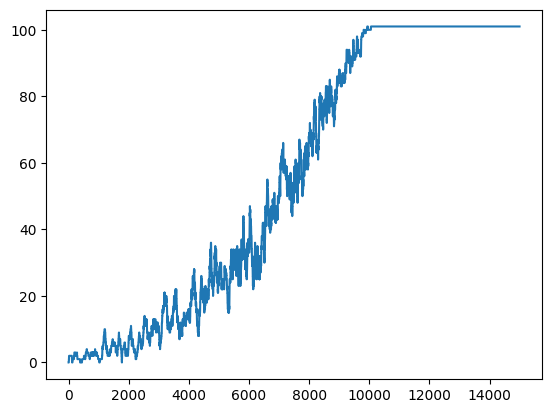

In [35]:
run_sarsa(15000)

# Now, let's use the updated Qtable for running another 100 episodes instead of initializing it with **zeros**!

In [38]:
def run_sarsa_updatedQ(episodes, render=False):

    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='rgb_array')

    f = open('qtable_updated_sarsa.pkl', 'rb')
    Qtable = pickle.load(f)
    f.close()
    print('Trained Q-table is:\n ', Qtable)

    rewards_episode = np.zeros(episodes)

    for i in range(episodes):

        state = env.reset()[0] # reset the environment so the agent is at state 0
        terminated = False # True when it reaches the goal or fall in hole
        truncated = False # True when actions > 200


        while(not terminated and not truncated):

            action = np.argmax(Qtable[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)


            state = next_state

            if render:
              screen = env.render()
              plt.imshow(screen)
              ipythondisplay.clear_output(wait=True)
              ipythondisplay.display(plt.gcf())

              time.sleep(1)


      # count a successful episode to analyze the performance of the agent
        plt.clf()
        if reward == 1:
              rewards_episode[i] = 1


    print("The number of successful episodes are: ", np.sum(rewards_episode))

    env.close()

    sum_rewards = np.zeros(episodes)

    for e in range(episodes):
      sum_rewards[e] = np.sum(rewards_episode[max(0, e - 100): (e+1)])

    plt.plot(sum_rewards)
    plt.savefig('frozen_lake_sarsa.png')

Trained Q-table is:
  [[0.10394993 0.59049    0.10768876 0.10198552]
 [0.11060344 0.         0.00758077 0.00725421]
 [0.00722213 0.00779605 0.00127581 0.00767756]
 [0.01335911 0.         0.01254988 0.01368859]
 [0.05934477 0.6561     0.         0.0601595 ]
 [0.         0.         0.         0.        ]
 [0.         0.72980999 0.         0.00750745]
 [0.         0.         0.         0.        ]
 [0.1250055  0.         0.729      0.06178016]
 [0.53470859 0.081      0.81       0.        ]
 [0.5396818  0.9        0.         0.00757397]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.74771171 0.9        0.29363141]
 [0.80977882 0.9        1.         0.80571007]
 [0.         0.         0.         0.        ]]
The number of successful episodes are:  1000.0


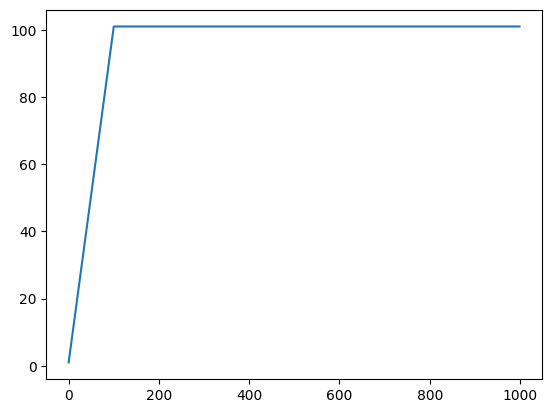

In [39]:
run_sarsa_updatedQ(1000, render=False)

# **Teaching the Agent: Q-Learning Algorithm**

**Now**, let's teach the agent how it can learn using Q-Learning:

---

## **Q-Learning**

**Q-Learning** is a type of temporal difference learning method.

### **Key Characteristics:**

- **Model-Free**: No need to model the environment.
- **Off-Policy**: Learns the value of the optimal policy independently of the agent's actions.

### **Algorithm Steps:**

1. **Choose** learning rate (α) and discount factor (γ).
2. **Initialize** Q-table (Q-value function) for all state-action pairs.
3. **Initialize** state (s).

4. **Loop** until convergence or for a specified number of iterations:
   1. Take action a, get reward R, and reach state s' (next state).
   2. Update Q-value: `Q(s, a) ← Q(s, a) + α [R + γ * max_a Q(s', a) - Q(s, a)]`
   3. Update state: `s ← s'`

---

With the Q-Learning algorithm, we aim to train our agent to make optimal decisions by learning from its experiences. Let's proceed to the implementation and observe the results!


In [1]:
# defining function for updating q-value for Q-Learning method

def update_Qtable_Qlearning(qtable, state, action, reward, next_state, alpha, gamma):

    qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[next_state, :]) - qtable[state, action])

    return qtable

In [40]:
def run_ql(episodes, render=False):

    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='rgb_array')

    Qtable = np.zeros((env.observation_space.n, env.action_space.n))

    alpha = 0.9 # learning rate
    gamma = 0.9 # gamma

    epsilon = 1 # 1 means always the agent takes a random action

    epsilon_decay_rate = 0.0001

    rng = np.random.default_rng() # generate random number

    rewards_episode = np.zeros(episodes)

    for i in range(episodes):

        state = env.reset()[0] # reset the environment so the agent is at state 0
        terminated = False # True when it reaches the goal or fall in hole
        truncated = False # True when actions > 200

        while(not terminated and not truncated):

            action = epsilon_greedy_policy(Qtable, state, epsilon)

            next_state, reward, terminated, truncated, _ = env.step(action)



            Qtable = update_Qtable_Qlearning(Qtable, state, action, reward, next_state, alpha, gamma) # Update Qtable

            state = next_state

            if render:
              screen = env.render()

              plt.imshow(screen)
              ipythondisplay.clear_output(wait=True)
              ipythondisplay.display(plt.gcf())


      # count a successful episode to analyze the performance of the agent
        plt.clf()

        epsilon = max(epsilon - epsilon_decay_rate, 0)
        if (epsilon==0):
              alpha = 0.0001
        if reward == 1:
              rewards_episode[i] = 1


    print("The number of successful episodes are: ", np.sum(rewards_episode))

    env.close()

    sum_rewards = np.zeros(episodes)

    for e in range(episodes):
      sum_rewards[e] = np.sum(rewards_episode[max(0, e - 100): (e+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake_sarsa.png')

    f = open('qtable_updated_ql.pkl', 'wb')
    pickle.dump(Qtable, f)
    f.close()

The number of successful episodes are:  9405.0


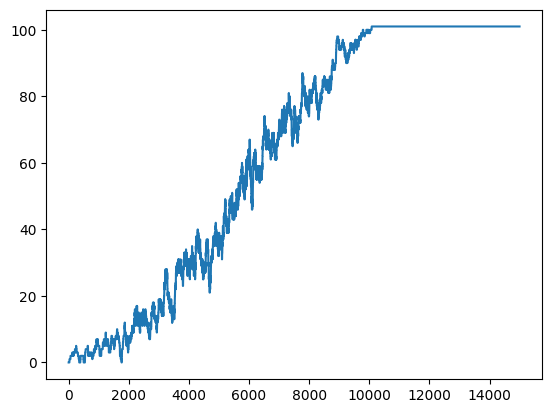

In [42]:
run_ql(15000)

### Compare with the SARSA method, Q-Learning method has around 1000 more rewards!!!!!

In [48]:
def run_ql_updatedQtable(episodes, render=False):

    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='rgb_array')

    f = open('qtable_updated_ql.pkl', 'rb')
    Qtable = pickle.load(f)
    f.close()

    rewards_episode = np.zeros(episodes)

    for i in range(episodes):

        state = env.reset()[0] # reset the environment so the agent is at state 0
        terminated = False # True when it reaches the goal or fall in hole
        truncated = False # True when actions > 200

        while(not terminated and not truncated):

            action = np.argmax(Qtable[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)

            state = next_state

            if render:
              screen = env.render()

              plt.imshow(screen)
              ipythondisplay.clear_output(wait=True)
              ipythondisplay.display(plt.gcf())

              time.sleep(1)

      # count a successful episode to analyze the performance of the agent
        plt.clf()

        if reward == 1:
              rewards_episode[i] = 1


    print("The number of successful episodes are: ", np.sum(rewards_episode))

    env.close()

    sum_rewards = np.zeros(episodes)

    for e in range(episodes):
      sum_rewards[e] = np.sum(rewards_episode[max(0, e - 100): (e+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake_ql_updated.png')

The number of successful episodes are:  1000.0


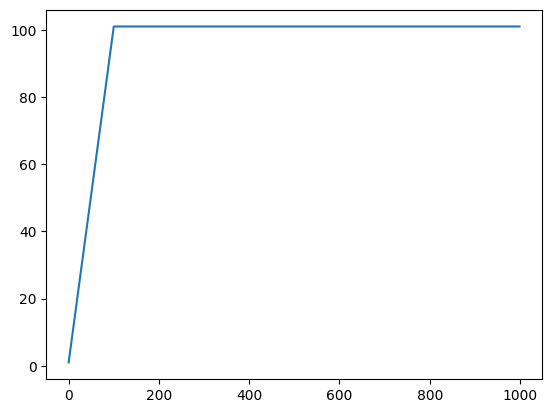

In [49]:
run_ql_updatedQtable(1000, render=False)

# Greedy-GQ algorithm

In [69]:
# Define function for updating the weight vector using the Greedy-GQ algorithm
def update_weights_GreedyGQ(w, state, action, reward, next_state, next_action, alpha, beta, gamma, phi_s_a, phi_s_next_a):
    """
    Update the weights using the Greedy-GQ algorithm.

    Parameters:
    w: Current parameter vector
    state: Current state
    action: Current action
    reward: Reward received after taking the action
    next_state: Next state after taking the action
    next_action: Next action taken in the next state
    alpha: Learning rate for Q-values
    beta: Learning rate for parameter vector w
    gamma: Discount factor
    phi_s_a: Feature vector for current state-action pair
    phi_s_next_a: Feature vector for next state-action pair

    Returns:
    w: Updated parameter vector
    """

    # Calculate the temporal difference error (TD error)
    td_error = reward + gamma * np.dot(w, phi_s_next_a) - np.dot(w, phi_s_a)

    # Update the parameter vector w
    w += beta * (td_error * phi_s_a - gamma * (np.dot(phi_s_a, phi_s_next_a)) * phi_s_next_a)

    # Update the Q-values using the TD error
    w += alpha * td_error * phi_s_a

    return w


The number of successful episodes are: 9333.0


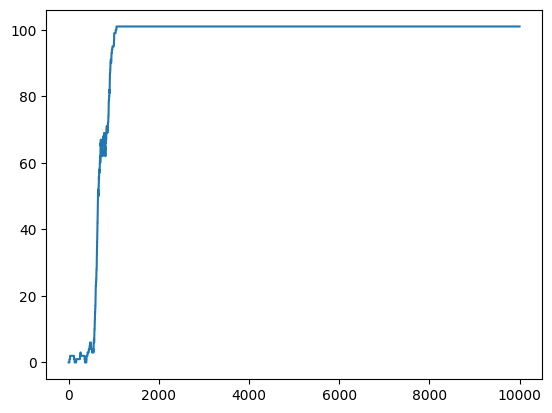

In [12]:
# Function to select action using epsilon-greedy policy
def epsilon_greedy_policy(state, w, epsilon, n_actions):
    if np.random.rand() < epsilon:
        return np.random.choice(n_actions)
    else:
        q_values = np.array([np.dot(w, get_feature_vector(state, action, n_actions)) for action in range(n_actions)])
        return np.argmax(q_values)

# Function to get the feature vector for a state-action pair
def get_feature_vector(state, action, n_actions):
    # Combine state and action into a single feature vector
    phi = np.zeros(n_actions * n_states)
    phi[state * n_actions + action] = 1
    return phi

# Function to run the Greedy-GQ algorithm with linear function approximation
def run_greedy_gq_linear(episodes, render=False):
    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='rgb_array')

    global n_states, n_actions
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    w = np.zeros(n_actions * n_states)  # Initialize weights for linear function approximation

    alpha = 0.1  # learning rate for Q-values
    alpha_decay_rate = 0.00001
    beta = 0.01  # learning rate for w
    beta_decay_rate = 0.00001
    gamma = 0.95  # discount factor

    epsilon = 1  # 1 means always the agent takes a random action
    epsilon_decay_rate = 0.001

    rng = np.random.default_rng()  # generate random number

    rewards_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]  # reset the environment so the agent is at state 0
        terminated = False  # True when it reaches the goal or falls in hole
        truncated = False  # True when actions > 200

        while not terminated and not truncated:
            action = epsilon_greedy_policy(state, w, epsilon, n_actions)

            next_state, reward, terminated, truncated, _ = env.step(action)

            next_action = epsilon_greedy_policy(next_state, w, epsilon, n_actions)

            # Feature vectors for current and next state-action pairs
            phi_s_a = get_feature_vector(state, action, n_actions)
            phi_s_next_a = get_feature_vector(next_state, next_action, n_actions)

            w = update_weights_GreedyGQ(w, state, action, reward, next_state, next_action, alpha, beta, gamma, phi_s_a, phi_s_next_a)

            state = next_state

            if render:
                screen = env.render()
                plt.imshow(screen)
                ipythondisplay.clear_output(wait=True)
                ipythondisplay.display(plt.gcf())
                time.sleep(1)

        # count a successful episode to analyze the performance of the agent
        plt.clf()

        epsilon = max(epsilon - epsilon_decay_rate, 0)
        beta = max(beta - beta_decay_rate, 0)
        alpha = max(alpha - alpha_decay_rate, 0)
        if epsilon == 0:
            alpha = 0.0001
        if reward == 1:
            rewards_episode[i] = 1

    print("The number of successful episodes are:", np.sum(rewards_episode))

    env.close()

    sum_rewards = np.zeros(episodes)
    for e in range(episodes):
        sum_rewards[e] = np.sum(rewards_episode[max(0, e - 100):(e + 1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake_greedy_gq_linear.png')

    with open('weights_updated_greedy_gq_linear.pkl', 'wb') as f:
        pickle.dump(w, f)

# Run the modified Greedy-GQ algorithm with linear function approximation
run_greedy_gq_linear(10000, render=False)


## Complete SARSA method

In [137]:
def run_sarsa(episodes, render=False, training=True, slippery=False):

    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=slippery, render_mode='rgb_array')

    if training:
      Qtable = np.zeros((env.observation_space.n, env.action_space.n))
    else:
      f = open('qtable_updated_sarsa.pkl', 'rb')
      Qtable = pickle.load(f)
      f.close()

    alpha = 0.9 # learning rate
    gamma = 0.9 # gamma, discount rate

    epsilon = 1 # 1 means always the agent takes a random action

    epsilon_decay_rate = 0.0001

    rng = np.random.default_rng() # generate random number

    rewards_episode = np.zeros(episodes)

    for i in range(episodes):

        state = env.reset()[0] # reset the environment so the agent is at state 0
        terminated = False # True when it reaches the goal or fall in hole
        truncated = False # True when actions > 200

        if training:
            action = epsilon_greedy_policy(Qtable, state, epsilon)

        while(not terminated and not truncated):

            if training:

                next_state, reward, terminated, truncated, _ = env.step(action)

                next_action = epsilon_greedy_policy(Qtable, next_state, epsilon)

                Qtable = update_Qtable_SARSA(Qtable, state, action, reward, next_state, next_action, alpha, gamma) # Update Qtable

                state = next_state
                action = next_action

            else:
                action = np.argmax(Qtable[state, :])
                next_state, reward, terminated, truncated, _ = env.step(action)
                state = next_state


            if render:
              screen = env.render()

              plt.imshow(screen)
              ipythondisplay.clear_output(wait=True)
              ipythondisplay.display(plt.gcf())


      # count a successful episode to analyze the performance of the agent
        plt.clf()


        epsilon = max(epsilon - epsilon_decay_rate, 0)
        if (epsilon==0):
              alpha = 0.0001
        if reward == 1:
              rewards_episode[i] = 1


    print("The number of successful episodes are: ", np.sum(rewards_episode))

    env.close()

    sum_rewards = np.zeros(episodes)

    for e in range(episodes):
      sum_rewards[e] = np.sum(rewards_episode[max(0, e - 100): (e+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake_sarsa.png')

    if training:

        f = open('qtable_updated_sarsa.pkl', 'wb')
        pickle.dump(Qtable, f)
        f.close()

The number of successful episodes are:  3218.0


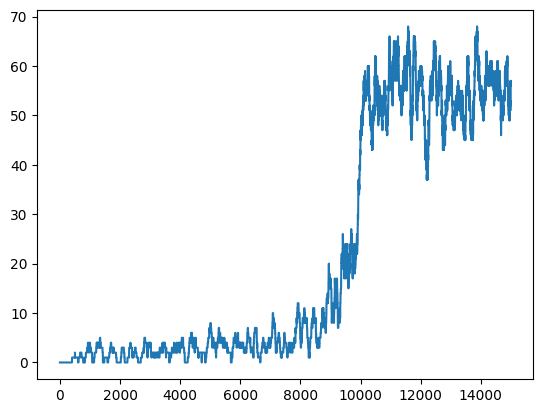

In [140]:
run_sarsa(15000, training=True, slippery=True)

The number of successful episodes are:  8251.0


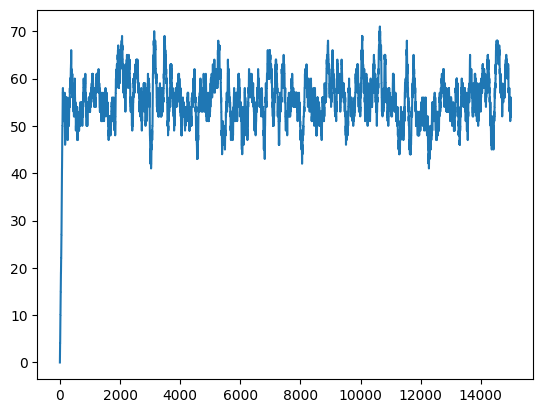

In [141]:
run_sarsa(15000, training=False, slippery=True)

## Complete Q-Learning method

In [152]:
def run_ql(episodes, render=False, training=True, slippery=False):

    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=slippery, render_mode='rgb_array')

    if training:
      Qtable = np.zeros((env.observation_space.n, env.action_space.n))
    else:
      f = open('qtable_updated_ql.pkl', 'rb')
      Qtable = pickle.load(f)
      f.close()

    alpha = 0.9 # learning rate
    gamma = 0.9 # gamma, discount rate

    epsilon = 1 # 1 means always the agent takes a random action

    epsilon_decay_rate = 0.0001

    rng = np.random.default_rng() # generate random number

    rewards_episode = np.zeros(episodes)

    for i in range(episodes):

        state = env.reset()[0] # reset the environment so the agent is at state 0
        terminated = False # True when it reaches the goal or fall in hole
        truncated = False # True when actions > 200


        while(not terminated and not truncated):

            if training:

                action = epsilon_greedy_policy(Qtable, state, epsilon)

            else:
                action = np.argmax(Qtable[state, :])


            next_state, reward, terminated, truncated, _ = env.step(action)

            if training:

                Qtable = update_Qtable_Qlearning(Qtable, state, action, reward, next_state, alpha, gamma) # Update Qtable

            state = next_state


            if render:
              screen = env.render()

              plt.imshow(screen)
              ipythondisplay.clear_output(wait=True)
              ipythondisplay.display(plt.gcf())

              time.sleep(1)


      # count a successful episode to analyze the performance of the agent
        plt.clf()


        epsilon = max(epsilon - epsilon_decay_rate, 0)
        if (epsilon==0):
              alpha = 0.0001
        if reward == 1:
              rewards_episode[i] = 1


    print("The number of successful episodes are: ", np.sum(rewards_episode))

    env.close()

    sum_rewards = np.zeros(episodes)

    for e in range(episodes):
      sum_rewards[e] = np.sum(rewards_episode[max(0, e - 100): (e+1)])

    if not render:
        plt.plot(sum_rewards)
        plt.savefig('frozen_lake_ql.png')

    if training:

        f = open('qtable_updated_ql.pkl', 'wb')
        pickle.dump(Qtable, f)
        f.close()

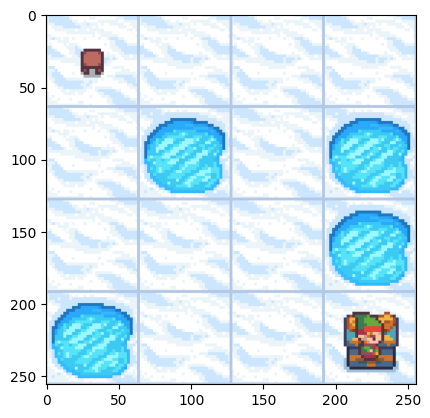

The number of successful episodes are:  1.0


<Figure size 640x480 with 0 Axes>

In [153]:
run_ql(1, training=False, slippery=False, render=True)

Define the function to choose action at each state based on epsilon greedy policy

Define the function to update Q-value function or Q-table